In [1]:
import numpy as np
import cv2

import PIL.Image as Image
#import os

#import matplotlib.pylab as plt

#import tensorflow as tf
#import tensorflow_hub as tensorflow_hub

from tensorflow import keras
#from tensorflow.keras import layers
#from tensorflow.keras.models import Sequential

import pathlib

In [2]:
confused_dataset_dir = "Engaged/confused"
engaged_dataset_dir = "Engaged/engaged"
frustrated_dataset_dir = "Engaged/frustrated"

Lookingaway_dataset_dir = "Not engaged/Looking Away"
bored_dataset_dir = "Not engaged/bored"
drowsy_dataset_dir = "Not engaged/drowsy"


confused_dataset_dir = pathlib.Path(confused_dataset_dir)
print(confused_dataset_dir)
engaged_dataset_dir = pathlib.Path(engaged_dataset_dir)
print(engaged_dataset_dir)
frustrated_dataset_dir = pathlib.Path(frustrated_dataset_dir)
print(frustrated_dataset_dir)
Lookingaway_dataset_dir = pathlib.Path(Lookingaway_dataset_dir)
print(Lookingaway_dataset_dir)
bored_dataset_dir = pathlib.Path(bored_dataset_dir)
print(bored_dataset_dir)
drowsy_dataset_dir = pathlib.Path(drowsy_dataset_dir)
print(drowsy_dataset_dir)

Engaged\confused
Engaged\engaged
Engaged\frustrated
Not engaged\Looking Away
Not engaged\bored
Not engaged\drowsy


In [3]:
list(confused_dataset_dir.glob('*'))[:5]

[WindowsPath('Engaged/confused/0020.jpg'),
 WindowsPath('Engaged/confused/0021.jpg'),
 WindowsPath('Engaged/confused/0032.jpg'),
 WindowsPath('Engaged/confused/0033.jpg'),
 WindowsPath('Engaged/confused/0034.jpg')]

In [4]:
image_count = len(list(confused_dataset_dir.glob('*')))
image_count

369

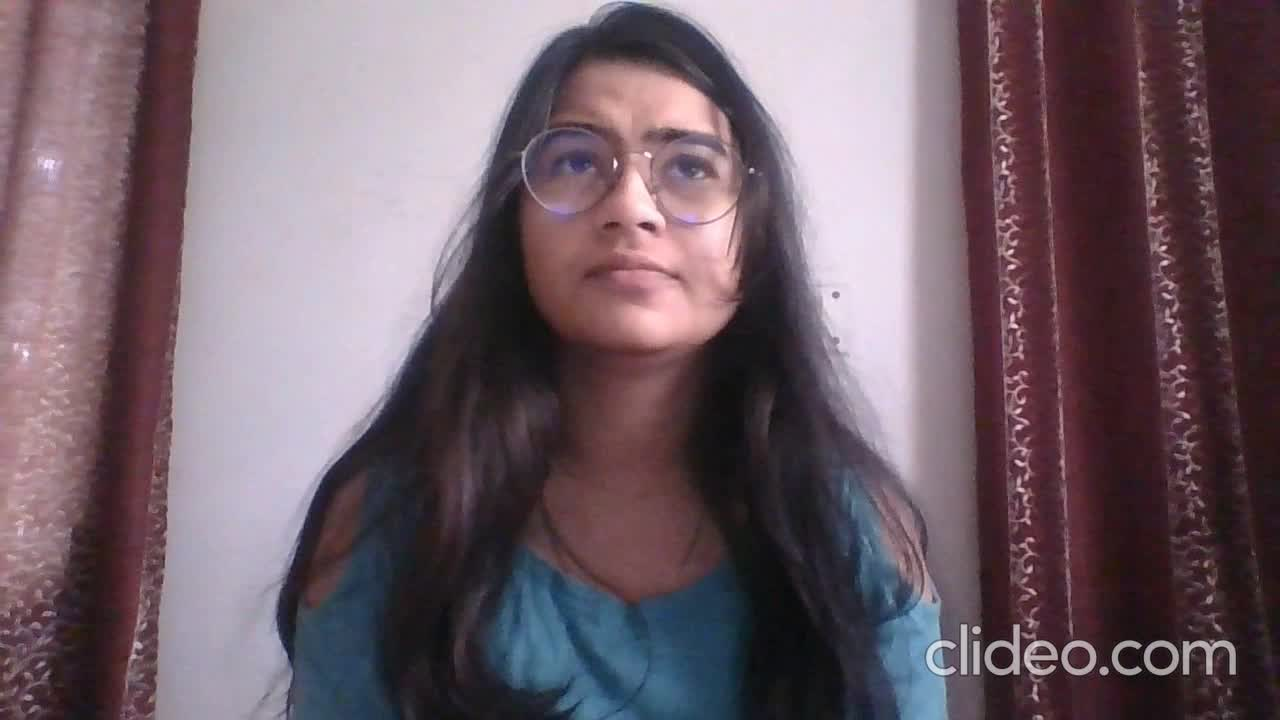

In [5]:
confused = list(confused_dataset_dir.glob("*"))
Image.open(str(confused[5])) 

In [6]:
image_dict = {
    'confused': list(confused_dataset_dir.glob('*')),
    'engaged' : list(engaged_dataset_dir.glob('*')),
    'frustrated': list(frustrated_dataset_dir.glob('*')),
    'Lookingaway' : list(Lookingaway_dataset_dir.glob('*')),
    'bored': list(bored_dataset_dir.glob('*')),
    'drowsy' : list(drowsy_dataset_dir.glob('*')),
}

In [7]:
labels_dict = {
    'confused': 0,
    'engaged' : 1,
    'frustrated': 2,
    'Lookingaway' : 3,
    'bored': 4,
    'drowsy' : 5,
}

labels_class = ['confused','engaged','frustrated','Lookingaway','bored','drowsy',]

In [8]:
img = cv2.imread(str(image_dict['engaged'][5]))
img.shape

(720, 1280, 3)

In [9]:
X = []
y = []

for label, images in image_dict.items():
  for image in images:
    img = cv2.imread(str(image))
    resized_img = cv2.resize(img,(360,360))
    X.append(resized_img)
    y.append(labels_dict[label])

In [10]:
X[0]

array([[[127, 128, 158],
        [135, 127, 158],
        [136, 124, 154],
        ...,
        [ 46,  30,  71],
        [ 45,  30,  71],
        [ 45,  31,  73]],

       [[128, 129, 159],
        [135, 128, 159],
        [138, 127, 157],
        ...,
        [ 47,  29,  70],
        [ 48,  32,  73],
        [ 48,  31,  74]],

       [[130, 130, 160],
        [135, 129, 160],
        [139, 129, 159],
        ...,
        [ 48,  30,  71],
        [ 51,  32,  75],
        [ 47,  30,  73]],

       ...,

       [[ 46,  37,  65],
        [ 50,  41,  68],
        [ 54,  48,  73],
        ...,
        [ 30,  26,  45],
        [ 33,  31,  50],
        [ 30,  30,  48]],

       [[ 48,  39,  66],
        [ 48,  39,  65],
        [ 52,  46,  70],
        ...,
        [ 27,  25,  44],
        [ 33,  31,  50],
        [ 33,  33,  51]],

       [[ 49,  40,  66],
        [ 48,  40,  63],
        [ 55,  49,  72],
        ...,
        [ 27,  26,  42],
        [ 33,  33,  49],
        [ 36,  36,  52]]

In [11]:
X = np.array(X)
y = np.array(y)

In [12]:
X[0].shape

(360, 360, 3)

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [14]:
X_test.shape

(530, 360, 360, 3)

In [15]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [16]:
model = keras.Sequential([
    keras.layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(360,360,3)),
    keras.layers.MaxPooling2D((2,2)),

    keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu',input_shape=(360,360,3)),
    keras.layers.MaxPooling2D((2,2)),

    keras.layers.Flatten(),
    keras.layers.Dense(64,activation='relu'),
    keras.layers.Dense(6,activation='softmax')
])

In [17]:
model.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

In [18]:
model.fit(X_train, y_train, epochs=2)  

Epoch 1/2
50/50 [==============================] - 166s 3s/step - loss: 0.6668 - accuracy: 0.8585
Epoch 2/2
50/50 [==============================] - 139s 3s/step - loss: 0.0989 - accuracy: 0.9547


In [19]:
model.evaluate(X_test,y_test)

17/17 [==============================] - 16s 746ms/step - loss: 0.0809 - accuracy: 0.9528


[0.08094649761915207, 0.9528301954269409]

In [20]:
predictions = model.predict(X_test)

17/17 [==============================] - 13s 731ms/step


In [21]:
predictions.shape

(530, 6)

In [22]:
verify_index = 450

In [23]:
pred_index = np.argmax(predictions[verify_index])

Pridicted state:  confused


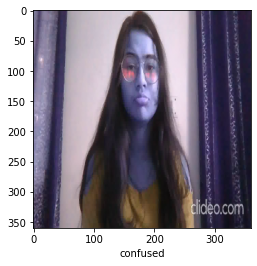

In [24]:
import matplotlib.pyplot as plt
plt.imshow(X_test[verify_index])
plt.xlabel(labels_class[y_test[verify_index]])
print("Pridicted state: ",labels_class[pred_index])

In [25]:
out_img = Image.fromarray(X_test[300],'RGB')
out_img.show()

In [26]:
history = model.fit(X_train,y_train,epochs = 10 , validation_data = (X_test, y_test))

Epoch 1/10
50/50 [==============================] - 195s 4s/step - loss: 0.0791 - accuracy: 0.9547 - val_loss: 0.1023 - val_accuracy: 0.9547
Epoch 2/10
50/50 [==============================] - 162s 3s/step - loss: 0.1014 - accuracy: 0.9509 - val_loss: 0.0851 - val_accuracy: 0.9547
Epoch 3/10
50/50 [==============================] - 160s 3s/step - loss: 0.0777 - accuracy: 0.9629 - val_loss: 0.0754 - val_accuracy: 0.9717
Epoch 4/10
50/50 [==============================] - 169s 3s/step - loss: 0.0749 - accuracy: 0.9698 - val_loss: 0.1021 - val_accuracy: 0.9396
Epoch 5/10
50/50 [==============================] - 158s 3s/step - loss: 0.0763 - accuracy: 0.9635 - val_loss: 0.0714 - val_accuracy: 0.9698
Epoch 6/10
50/50 [==============================] - 157s 3s/step - loss: 0.0626 - accuracy: 0.9673 - val_loss: 0.0648 - val_accuracy: 0.9736
Epoch 7/10
50/50 [==============================] - 157s 3s/step - loss: 0.0534 - accuracy: 0.9730 - val_loss: 0.0847 - val_accuracy: 0.9547
Epoch 8/10
50

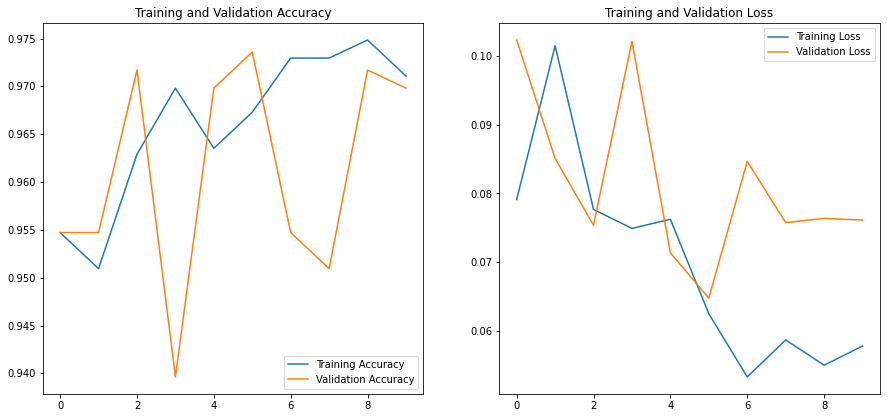

In [27]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [28]:
predictions = model.predict(X_test)

17/17 [==============================] - 15s 885ms/step


In [41]:
verify_index = 150

In [42]:
pred_index = np.argmax(predictions[verify_index])

Pridicted state:  confused


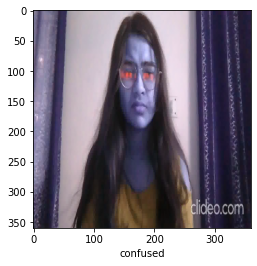

In [43]:
plt.imshow(X_test[verify_index])
plt.xlabel(labels_class[y_test[verify_index]])
print("Pridicted state: ",labels_class[pred_index])

In [80]:
rohit_dataset_dir = "rohit"
rohit_dataset_dir = pathlib.Path(rohit_dataset_dir)

In [81]:
rohit_images = list(rohit_dataset_dir.glob('*'))
rohit_images

[WindowsPath('rohit/r1.jpeg'),
 WindowsPath('rohit/r2.jpeg'),
 WindowsPath('rohit/r3.jpeg'),
 WindowsPath('rohit/r4.png'),
 WindowsPath('rohit/r5.jpg'),
 WindowsPath('rohit/r6.png'),
 WindowsPath('rohit/r7.jpg')]

In [82]:
X_rohit = []

for image in rohit_images:
    img = cv2.imread(str(image))
    resized_img = cv2.resize(img,(360,360))
    X_rohit.append(resized_img)

In [83]:
X_rohit = np.array(X_rohit)
X_rohit = X_rohit / 255.0

In [84]:
predictions = model.predict(X_rohit)

1/1 [==============================] - 0s 239ms/step


In [91]:
predictions

array([[2.02587835e-05, 2.22736144e-05, 1.33583962e-04, 9.77169335e-01,
        1.13304544e-04, 2.25412324e-02],
       [6.33239824e-06, 1.17513650e-06, 1.52672078e-06, 9.98441875e-01,
        3.03171895e-04, 1.24595384e-03],
       [5.93506968e-07, 2.59087983e-07, 9.00255543e-07, 9.99266326e-01,
        3.85949988e-06, 7.28073413e-04],
       [6.20855781e-06, 7.48216780e-06, 3.25704349e-07, 9.99485254e-01,
        4.36238988e-05, 4.57053800e-04],
       [5.15682359e-06, 6.43472231e-06, 1.72511747e-07, 9.99724567e-01,
        1.81479154e-05, 2.45449162e-04],
       [1.59663803e-04, 2.27073178e-05, 2.09108521e-06, 9.86759901e-01,
        7.99512584e-03, 5.06047998e-03],
       [2.54874067e-05, 3.16333135e-05, 1.13564909e-06, 9.97965693e-01,
        1.16016530e-03, 8.15920997e-04]], dtype=float32)

In [94]:
rohit_pred_index = np.argmax(predictions[1])

Pridicted state:  Lookingaway


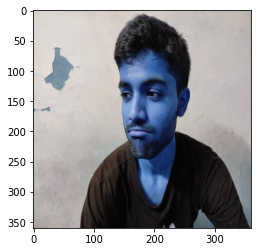

In [95]:
plt.imshow(X_rohit[1])
#plt.xlabel(labels_class[y_test[2]])
print("Pridicted state: ",labels_class[rohit_pred_index])